In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, transpile
from qiskit.tools.visualization import plot_histogram
from qiskit.quantum_info import Statevector

# Functions

In [2]:
def creat_circuit(N):
    # define our quantum bits
    quantum_bit = QuantumRegister(size=N, name="qubit") 
    # define our classical bits
    classical_bit = ClassicalRegister(size=N, name="bit") 
    # Creates a quantum circuit with one q-bit
    circuit = QuantumCircuit(quantum_bit, classical_bit)

    return qb, cb, circuit


def run_circuit(circuit):
    # configuring the simulator
    simulator = Aer.get_backend('qasm_simulator')
    # compile the circuit to the simulator
    compiled_circuit = transpile(circuit, simulator)
    # executing the simulation and returning the results
    return simulator.run(compiled_circuit, shoot=1024).result()


def measure_experiment(q_bit, c_bit, circuit):
    # Measuring the qubit
    circuit.measure(q_bit, c_bit)
    circuit.draw('mpl', style="clifford")
    
    state = run_circuit(circuit)
    dict_res = state.get_counts(circuit)
    counts_res = {k: dict_res[k]/100 for k in dict_res.keys()}
    display(plot_histogram(counts_res))


# test
# quantum_bit, classical_bit, circ = creat_circuit(2)
# circ.draw('mpl', style="clifford")
# measure_experiment(quantum_bit, classical_bit, circ)

# Section
1. [Basics](#1)
2. [One qubit gates](#2)
    1. [Creating superposition](#21)
    2. [Pauli Gates - XYZ](#22)
        1. [The X gate](#221)
        2. [The Y gate](#222)
        3. [The Z gate](#223)
3. [Two qubit states](#3)
    1. [Superposition in a two q-ubit state](#31)
4. [Creating entanglement](#4)
    1. [First Bell state](#41)
    2. [Second Bell state](#42)
    3. [Third Bell state](#43)
    4. [Fourth Bell state](#44)

# Basics <a id='1'></a>

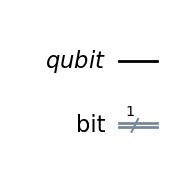

In [3]:
n = 1
# define our quantum bits
qb = QuantumRegister(size=n, name="qubit") 
# define our classical bits
cb = ClassicalRegister(size=n, name="bit") 
# Creates a quantum circuit with one q-bit
quantum_circuit = QuantumCircuit(qb, cb)
quantum_circuit.draw('mpl', style="clifford")

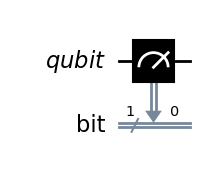

In [4]:
# Measuring the qubit
quantum_circuit.measure(qb, cb)
quantum_circuit.draw('mpl', style="clifford")

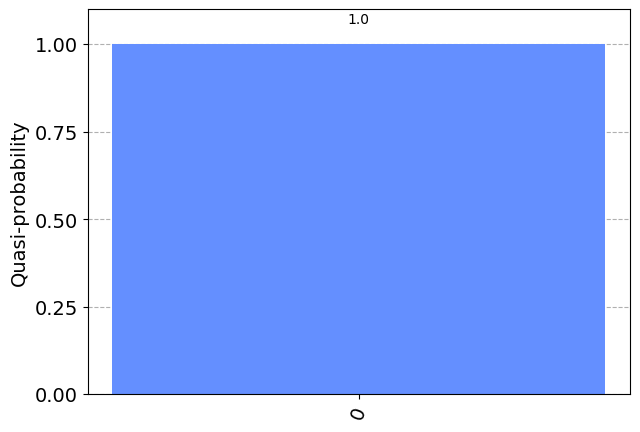

In [5]:
simple_state = run_circuit(quantum_circuit)
dictionary = simple_state.get_counts(quantum_circuit)
counts = {k: dictionary[k]/100 for k in dictionary.keys()}
plot_histogram(counts)

# One qubit gates <a id="2"></a>

## Creating superposition  <a id='21'></a>

Hadamard Gate

$$H= \frac{1}{\sqrt{2}}\begin{pmatrix}
1 & 1\\
1 & -1
\end{pmatrix}$$

This gate acts on the state $|0\rangle$, producing
$$
H |0 \rangle = \frac{1}{\sqrt{2}} (|0\rangle + |1\rangle) =|+⟩$$

and it acts on the state $|1\rangle$, producing
$$
H |1 \rangle = \frac{1}{\sqrt{2}} (|0\rangle - |1\rangle)=|-⟩$$

In [6]:
n = 1
qb = QuantumRegister(size=n, name="qubit")
cb = ClassicalRegister(size=n, name="bit")
circ = QuantumCircuit(qb, cb)

# Applying the Hadamard gate
circ.h(qb[0])

print("The state after action of H gate")
Statevector(circ).draw("latex", convention="ket")

The state after action of H gate


<IPython.core.display.Latex object>

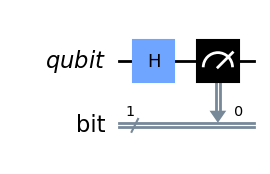

In [7]:
circ.measure(qb, cb)
circ.draw('mpl', style="clifford")

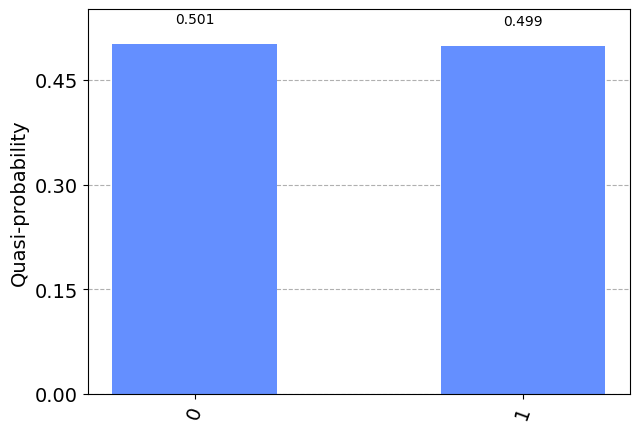

In [8]:
res =  run_circuit(circ)
counts = res.get_counts(circ)
counts = {k: counts[k]/100 for k in counts.keys()}

plot_histogram(counts)

## Pauli Gates - XYZ  <a id='22'></a>

The Pauli gates are the Pauli matrices, and act in a single q-bit.

### The X gate  <a id='221'></a>
$$X= \begin{pmatrix}
0 & 1\\
1 & 0
\end{pmatrix}$$

This gate acts like the classical NOT gate. If we apply it on the state $|0\rangle$, it produces the state $|1\rangle$ and if it acts on the state $|1\rangle$, it produces the state $|0\rangle$.
$$ X |0 \rangle = |1\rangle$$

$$X |1 \rangle = |0\rangle$$

In [9]:
n = 1
qb = QuantumRegister(size=n, name="qubit")
cb = ClassicalRegister(size=n, name="bit")

circ = QuantumCircuit(qb, cb)
circ.x(qb[0])

print("The state after action of X gate")
Statevector(circ).draw("latex", convention="ket")

The state after action of X gate


<IPython.core.display.Latex object>

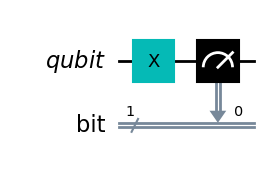

In [10]:
circ.measure(qb, cb)
circ.draw('mpl', style="clifford")

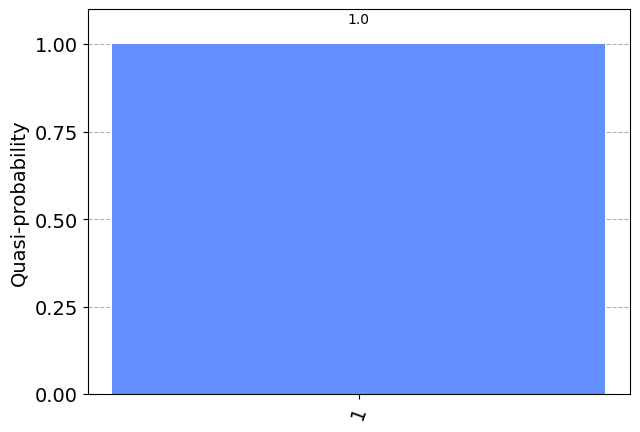

In [11]:
result = run_circuit(circ)
counts = result.get_counts(circ)
counts = {k: counts[k]/100 for k in counts.keys()}
# plotting histogram
plot_histogram(counts)

### The Y gate <a id='222'></a>


$$Y= \begin{pmatrix}
0 & -i\\
i & 0
\end{pmatrix}$$

Applying it on the states $|0\rangle$ and $|1\rangle$ will produce

$$
Y |0 \rangle = i|1\rangle
$$

$$
Y |1 \rangle = -i|0\rangle
$$

In [12]:
n = 1
qb = QuantumRegister(size=n, name="qubit")
cb = ClassicalRegister(size=n, name="bit")

circ = QuantumCircuit(qb, cb)
circ.y(qb[0])

print("The state after action of Y gate")
Statevector(circ).draw("latex", convention="ket")


The state after action of Y gate


<IPython.core.display.Latex object>

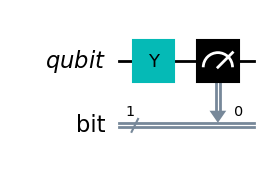

In [13]:
circ.measure(qb, cb)
circ.draw('mpl', style="clifford")

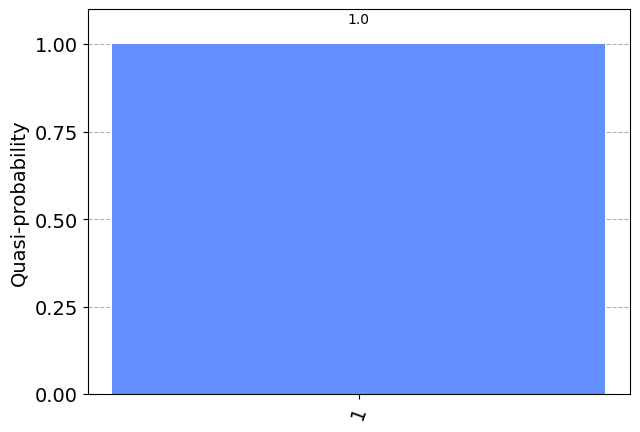

In [14]:
result = run_circuit(circ)
counts = result.get_counts(circ)
counts = {k: counts[k]/100 for k in counts.keys()}

plot_histogram(counts)

### The Z gate <a id='223'></a>

$$ Z = \begin{pmatrix}
1 & 0 \\
0 & -1
\end{pmatrix}$$

Applying it on the state $|0\rangle$ and $|1\rangle$ gives


$$
Z |0 \rangle = |0\rangle
$$

$$
Z |1 \rangle = -|1\rangle
$$

In [15]:
n = 1
qb = QuantumRegister(size=n, name="qubit")
cb = ClassicalRegister(size=n, name="bit")

circ = QuantumCircuit(qb, cb)
# circ.x(qb[0]) # inverting the state with X
circ.z(qb[0])

print("The state after action of Z gate ")
Statevector(circ).draw("latex", convention="ket")

The state after action of Z gate 


<IPython.core.display.Latex object>

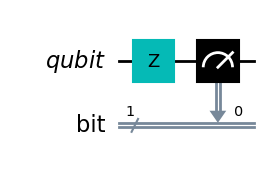

In [16]:
circ.measure(qb, cb)
circ.draw('mpl', style="clifford")

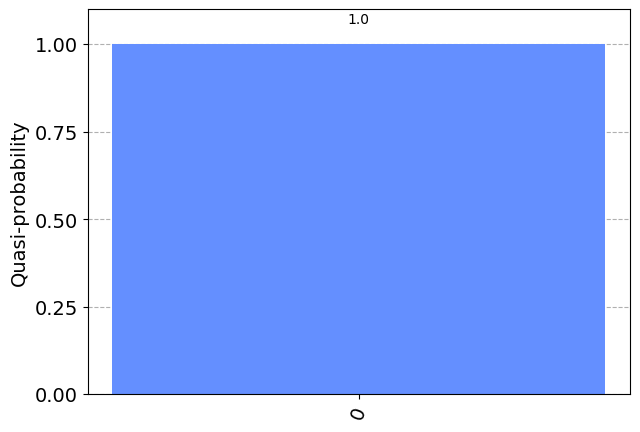

In [17]:
result = run_circuit(circ)
counts = result.get_counts(circ)
counts = {k: counts[k]/100 for k in counts.keys()}
plot_histogram(counts)

# Two qubit states  <a id='3'></a>

We take advatage of the matrix product operation to construct a two-quibit basis.
There are 4 possible states in a system consisting of two qubits:

| $q_0$                 |   $q_1$       | $|q_0, q_1\rangle$ |
|:------:               |:---------:    |:---------:         |
|   $ | 0\rangle$       | $ | 0\rangle$ | $|00\rangle$|
|   $ | 0\rangle$       | $ | 1\rangle$ | $|01\rangle$ |
|   $ | 1\rangle$       | $ | 0\rangle$ | $|10\rangle$|
|   $ | 1\rangle$       | $ | 1\rangle$ | $|11\rangle$ |


The two q-ubit basis is wrriten as the tensor products

$$ |00\rangle =  |0\rangle \otimes | 0\rangle = 
\begin{pmatrix}
1 \\
0
\end{pmatrix}
\otimes
\begin{pmatrix} 
1 \\ 
0
\end{pmatrix} =
\begin{pmatrix} 
1 \begin{pmatrix} 1 \\ 0\end{pmatrix} \\ 
0 \begin{pmatrix} 1 \\ 0\end{pmatrix} 
\end{pmatrix}=
\begin{pmatrix}
1 \\
0 \\
0 \\
0
\end{pmatrix}
$$


$$ |01\rangle =  |0\rangle \otimes | 1\rangle = 
\begin{pmatrix}
1 \\
0
\end{pmatrix}
\otimes
\begin{pmatrix} 
0 \\ 
1
\end{pmatrix} =
\begin{pmatrix} 
1 \begin{pmatrix} 0 \\ 1\end{pmatrix} \\ 
0 \begin{pmatrix} 0 \\ 1\end{pmatrix} 
\end{pmatrix}=
\begin{pmatrix}
0 \\
1 \\
0 \\
0
\end{pmatrix}
$$


$$ |10\rangle =  |1\rangle \otimes | 0\rangle = 
\begin{pmatrix}
0 \\
1
\end{pmatrix}
\otimes
\begin{pmatrix} 
1 \\ 
0
\end{pmatrix} =
\begin{pmatrix} 
0 \begin{pmatrix} 1 \\ 0\end{pmatrix} \\ 
1 \begin{pmatrix} 1 \\ 0\end{pmatrix} 
\end{pmatrix}=
\begin{pmatrix}
0 \\
0 \\
1 \\
0
\end{pmatrix}
$$


$$ |11\rangle =  |1\rangle \otimes | 1\rangle = 
\begin{pmatrix}
0 \\
1
\end{pmatrix}
\otimes
\begin{pmatrix} 
0 \\ 
1
\end{pmatrix} =
\begin{pmatrix} 
0 \begin{pmatrix} 0 \\ 1\end{pmatrix} \\ 
1 \begin{pmatrix} 0 \\ 1\end{pmatrix} 
\end{pmatrix}=
\begin{pmatrix}
0 \\
0 \\
0 \\
1
\end{pmatrix}
$$


In [18]:
n = 2
# define our quantum bits
qb = QuantumRegister(size=n, name="qubit") 
# define our classical bits
cb = ClassicalRegister(size=n, name="bit") 

# Creates a quantum circuit with one q-bit
quantum_circuit = QuantumCircuit(qb, cb)

# state 01 (10 no qiskit a notação é trocada)
# quantum_circuit.x(qb[1])

# state 10 (01 no qiskit a notação é trocada)
# quantum_circuit.x(qb[0])

# state 11
quantum_circuit.x(qb[0])
quantum_circuit.x(qb[1])

print("Two q-ubit states: ")
Statevector(quantum_circuit).draw("latex", convention="ket")

Two q-ubit states: 


<IPython.core.display.Latex object>

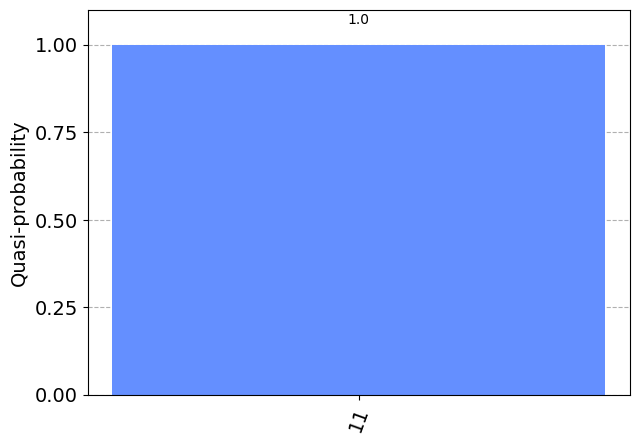

In [19]:
measure_experiment(qb, cb, quantum_circuit)

## Superposition in a two q-ubit state <a id='31'></a>

In [20]:
n = 2
# define our quantum bits
qb = QuantumRegister(size=n, name="qubit") 
# define our classical bits
cb = ClassicalRegister(size=n, name="bit") 

# Creates a quantum circuit with one q-bit
quantum_circuit = QuantumCircuit(qb, cb)

# superposition in the first q-ubit
# quantum_circuit.h(qb[0])

# superposition in the second q-ubit
# quantum_circuit.h(qb[1])

# superposition in both q-ubits
quantum_circuit.h(qb[0])
quantum_circuit.h(qb[1])

print("Two q-ubit states: ")
Statevector(quantum_circuit).draw("latex", convention="ket")

Two q-ubit states: 


<IPython.core.display.Latex object>

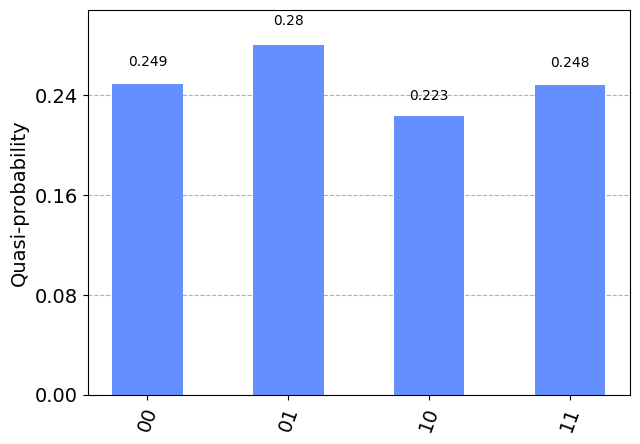

In [21]:
measure_experiment(qb, cb, quantum_circuit)

# Creating entanglement  <a id='4'></a>

The controlled gates act on 2 or more qubits, where one or more qubits act as a control for some operation.

For example, the controlled NOT gate (or CNOT or CX) acts on 2 qubits, and performs the NOT operation on the second qubit only when the first qubit is
$|1\rangle$, and otherwise leaves it unchanged.

With respect to the basis $|00\rangle$, $|01\rangle$, $|10\rangle$, $|11\rangle$ , it is represented by the Hermitian unitary matrix

$$CNOT = \begin{pmatrix}
1 & 0  & 0 & 0\\
0 & 1  & 0 & 0\\
0 & 0  & 0 & 1\\
0 & 0  & 1 & 0
\end{pmatrix}$$

| Before |           | After |           |
|:------:|:---------:|:-----:|:---------:|
| $q_0$  |   $q_1$   | $q_0$ |   $q_1$   |
|   $    | 0\rangle$ |   $   | 0\rangle$ | $|0\rangle$ | $|0\rangle$ |
|   $    | 0\rangle$ |   $   | 1\rangle$ | $|0\rangle$ | $|1\rangle$ |
|   $    | 1\rangle$ |   $   | 0\rangle$ | $|1\rangle$ | $|1\rangle$ |
|   $    | 1\rangle$ |   $   | 1\rangle$ | $|1\rangle$ | $|0\rangle$ |

In bellow, the gates are added to the circuit one-by-one to form the Bell states.

## First Bell state <a id='41'></a>

$$|\Phi^{+}⟩ = \frac{1}{\sqrt{2}}(|00⟩+ |11⟩) $$

In [22]:
n = 2
qb = QuantumRegister(n, name="qubit")
cb = ClassicalRegister(n, name="bit")
circ = QuantumCircuit(qb, cb)

# use a Hadamard gate on qubit 0, which puts it into a superposition state.
circ.h(qb[0])
# A controlled-Not operation on control qubit 0 and target qubit 1,
# putting the qubits in an entangled state.
circ.cx(qb[0], qb[1])

print("Bell state: ")
Statevector(circ).draw("latex", convention="ket")

Bell state: 


<IPython.core.display.Latex object>

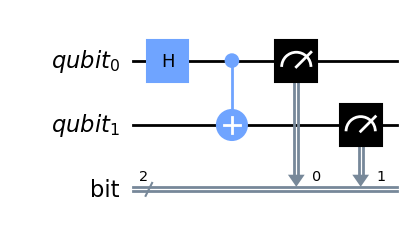

In [23]:
# measuring
circ.measure(qb, cb)
circ.draw('mpl', style="clifford")

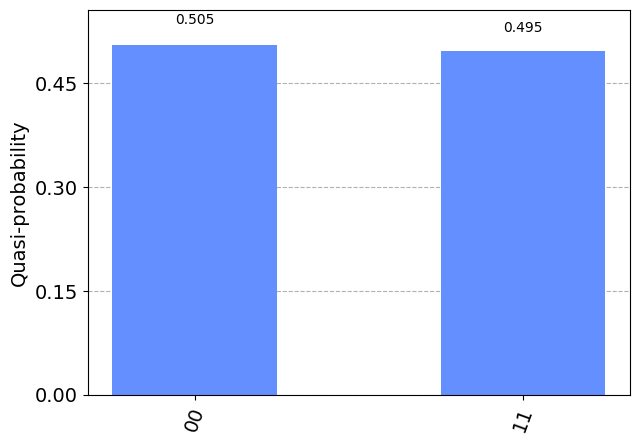

In [24]:
result = run_circuit(circ)
counts = result.get_counts(circ)
counts = {k: counts[k]/100 for k in counts.keys()}
plot_histogram(counts)

## Second Bell state <a id='42'></a>

$$|\Phi^{-}⟩ = \frac{1}{\sqrt{2}}(|00⟩ - |11⟩) $$

In [25]:
n = 2
qb = QuantumRegister(n, name="qubit")
cb = ClassicalRegister(n, name="bit")
circ = QuantumCircuit(qb, cb)

# gates
circ.x(qb[0])
circ.h(qb[0])
circ.cx(qb[0], qb[1])

print("Bell state: ")
Statevector(circ).draw("latex", convention="ket")

Bell state: 


<IPython.core.display.Latex object>

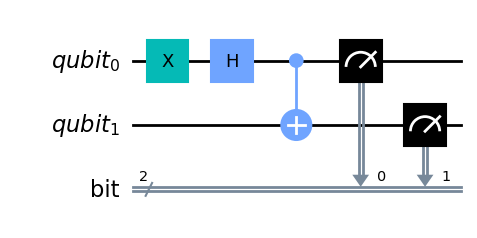

In [26]:
# measuring
circ.measure(qb, cb)
circ.draw('mpl', style="clifford")

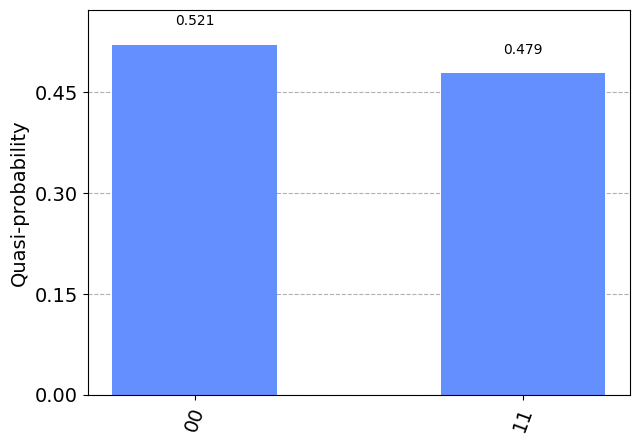

In [27]:
result = run_circuit(circ)
counts = result.get_counts(circ)
counts = {k: counts[k]/100 for k in counts.keys()}

plot_histogram(counts)

## Third Bell state <a id='43'></a>

$$|\Psi^{+}⟩ = \frac{1}{\sqrt{2}}(|01⟩ + |10⟩) $$

Bell state: 


<IPython.core.display.Latex object>

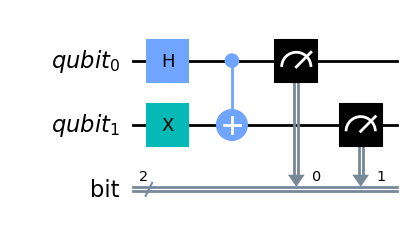

In [28]:
n = 2
qb = QuantumRegister(n, name="qubit")
cb = ClassicalRegister(n, name="bit")
circ = QuantumCircuit(qb, cb)

# gates
circ.x(qb[1])
circ.h(qb[0])
circ.cx(qb[0], qb[1])

print("Bell state: ")
display(Statevector(circ).draw("latex", convention="ket"))

# measuring
circ.measure(qb, cb)
circ.draw('mpl', style="clifford")

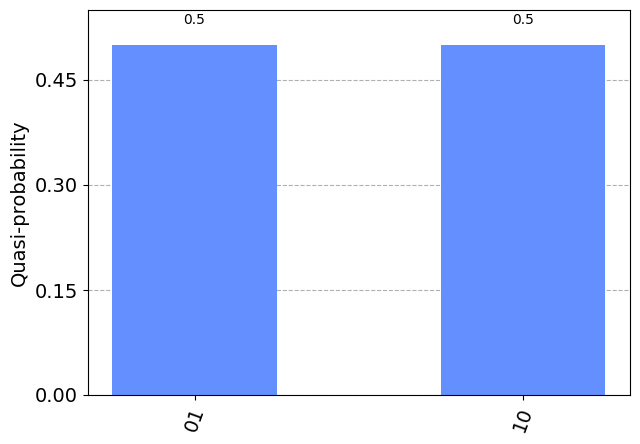

In [29]:
result = run_circuit(circ)
counts = result.get_counts(circ)
counts = {k: counts[k]/100 for k in counts.keys()}
plot_histogram(counts)

## Fourth Bell state <a id='44'></a>


$$|\Psi^{-}⟩ = \frac{1}{\sqrt{2}}(|01⟩ - |10⟩) $$

Bell state: 


<IPython.core.display.Latex object>

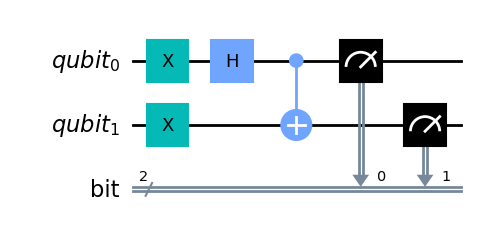

In [30]:
n = 2
qb = QuantumRegister(n, name="qubit")
cb = ClassicalRegister(n, name="bit")
circ = QuantumCircuit(qb, cb)

# gates
circ.x(qb[0])
circ.h(qb[0])
circ.x(qb[1])
circ.cx(qb[0], qb[1])

print("Bell state: ")
display(Statevector(circ).draw("latex", convention="ket"))

# measuring
circ.measure(qb, cb)
circ.draw('mpl', style="clifford")

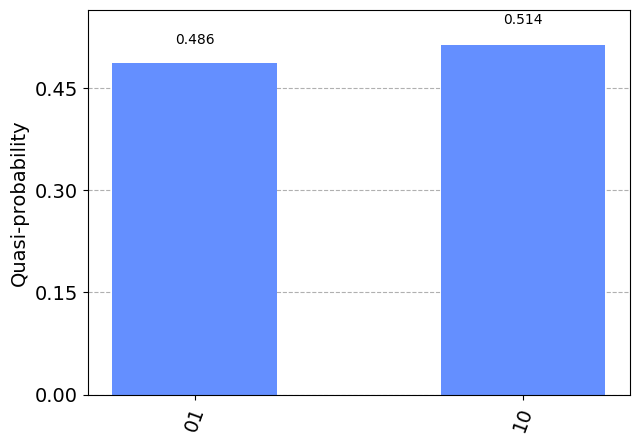

In [31]:
result =run_circuit(circ)

# Returns counts
counts = result.get_counts(circ)

counts = {k: counts[k]/100 for k in counts.keys()}
# Plot a histogram
plot_histogram(counts)